In [1]:
import pandas as pd 
import numpy as np

In [2]:
import nltk
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [6]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [7]:
for mess_no, messages in enumerate(messages[:10]):
    print(mess_no, messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

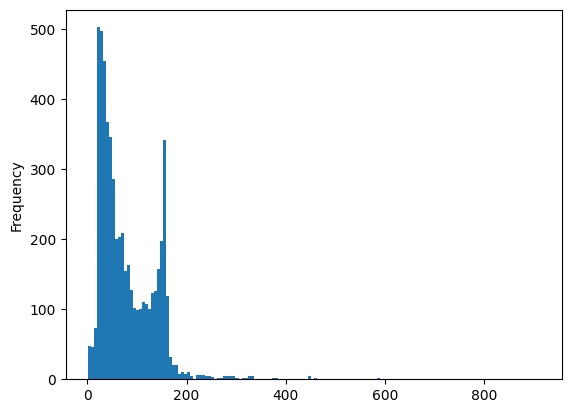

In [17]:
messages['length'].plot.hist(bins=150)
plt.show()

In [18]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [19]:
 messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

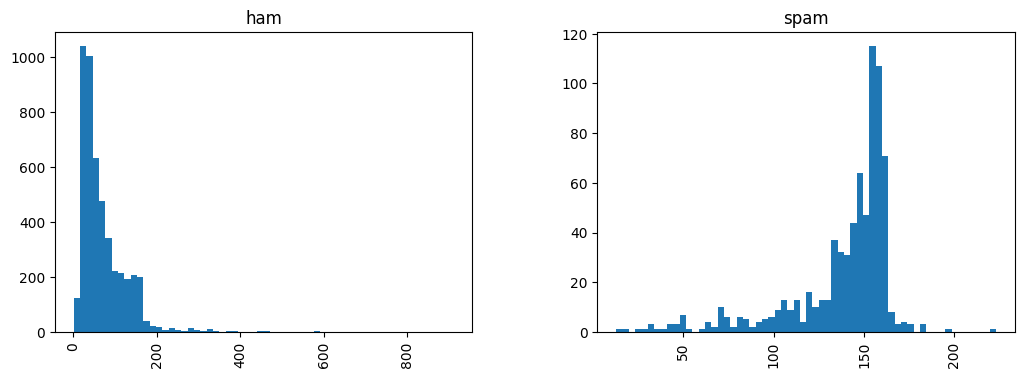

In [20]:
messages.hist(column ='length', by='label', bins = 60, figsize=(12,4))
plt.show()

### Spam Vs ham
from the above figure ham vs spam  
Spam tend to have more words than ham 

In [22]:
import string 

In [23]:
mess = 'Sample message! Notice it as punctuation.'

In [24]:
mess

'Sample message! Notice it as punctuation.'

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Now removing the  !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ 
these types of strings from the above text 

In [27]:
# Removing the string punctuation 
nopunc = [c for c in mess if c not in string.punctuation]

In [28]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [29]:
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [31]:
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it as punctuation'

In [32]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'as', 'punctuation']

In [33]:
clean_mess = [word for word in nopunc.split() 
              if word.lower() not in stopwords.words('english')]


Its basically extracting all the normal used words from the stopwords and removing it
### 1. word for word in nopunc.split()
This means:

###### "Loop through each word in the list that results from nopunc.split()"
###### nopunc.split() splits a sentence into individual words.

So now the loop becomes:
##### for word in ['Sample', 'message', 'Notice', 'it', 'as', 'punctuation']

### 2. if word.lower() not in stopwords.words('english')
This is a filter condition. It says:

Convert each word to lowercase using .lower()

Check if that lowercase word is not in the list of English stopwords

Example stopwords: ['a', 'the', 'and', 'is', 'it', 'as', ...]

So for our example:

'Sample' ➝ 'sample' ➝ not in stopwords ✅

'message' ➝ 'message' ➝ not in stopwords ✅

'Notice' ➝ 'notice' ➝ not in stopwords ✅

'it' ➝ 'it' ➝ in stopwords ❌

'as' ➝ 'as' ➝ in stopwords ❌

'punctuation' ➝ 'punctuation' ➝ not in stopwords ✅

Only the words not in stopwords are kept.

✅ Final result:
['Sample', 'message', 'Notice', 'punctuation']

In [35]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [36]:
def text_process(mess):
  '''
  1. remove punc
  2. remove stop words
  3. return list of clean test_words
  '''
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  return [word for word in nopunc.split() 
          if word.lower() not in stopwords.words('english')]

In [37]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
messages['message'].head(10).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
bow_transformer = CountVectorizer(analyzer= text_process).fit(messages['message'])

In [41]:
print(len(bow_transformer.vocabulary_))

11425


In [42]:
mess4 = messages['message'][3]

In [43]:
mess4

'U dun say so early hor... U c already then say...'

In [44]:
bow4 = bow_transformer.transform([mess4])

In [45]:
print(bow4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [46]:
print(bow4.shape)

(1, 11425)


In [47]:
'''Here [9554 is the word say which was converted 
into numerical form and which was repeated twice'''
bow_transformer.get_feature_names_out()[9554]


'say'

In [48]:
messages_bow = bow_transformer.transform(messages['message'])

In [49]:
print('Shape of Sparse Matrix: ', messages_bow)

Shape of Sparse Matrix:  <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 50548 stored elements and shape (5572, 11425)>
  Coords	Values
  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


In [50]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [51]:
# nnz = Non Zero occurences 
messages_bow.nnz

50548

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [54]:
tfidf4 = tfidf_transformer.transform(bow4)

In [55]:
print(tfidf4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	0.4083258993338407
  (0, 4629)	0.2661980190608719
  (0, 5261)	0.2972995740586873
  (0, 6204)	0.2995379972369742
  (0, 6222)	0.31872168929491496
  (0, 7186)	0.4389365653379858
  (0, 9554)	0.5385626262927565


In [56]:
# Checking the weight of a random word using tfidf_transformer
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

np.float64(8.527076498901426)

In [57]:
# Checking the weight of a random word  using tfidf_transformer
tfidf_transformer.idf_[bow_transformer.vocabulary_['hospital']]

np.float64(7.428464210233317)

In [58]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [59]:
messages_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50548 stored elements and shape (5572, 11425)>

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [62]:
spam_detect_model.predict(tfidf4)[0]

np.str_('ham')

In [63]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [64]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [65]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
msg_train,msg_test,label_train,label_test= train_test_split(messages['message'], messages['label'], test_size = 0.3, random_state=42)

In [68]:
msg_train

708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
5029    Go chase after her and run her over while she'...
4921     G says you never answer your texts, confirm/deny
2592         Still work going on:)it is very small house.
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: message, Length: 3900, dtype: object

In [171]:
from sklearn.pipeline import Pipeline

In [173]:
pipeline= Pipeline([
           ('bow', CountVectorizer(analyzer= text_process)),
           ('tfidf', TfidfTransformer()),
           ('classifier', MultinomialNB())
])

In [175]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001CF0F2665C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [177]:
predictions = pipeline.predict(msg_test)

In [179]:
from sklearn.metrics import classification_report

In [181]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

